(128, 128, 128, 3)
(212, 128, 128)
1
11471
[0 1]


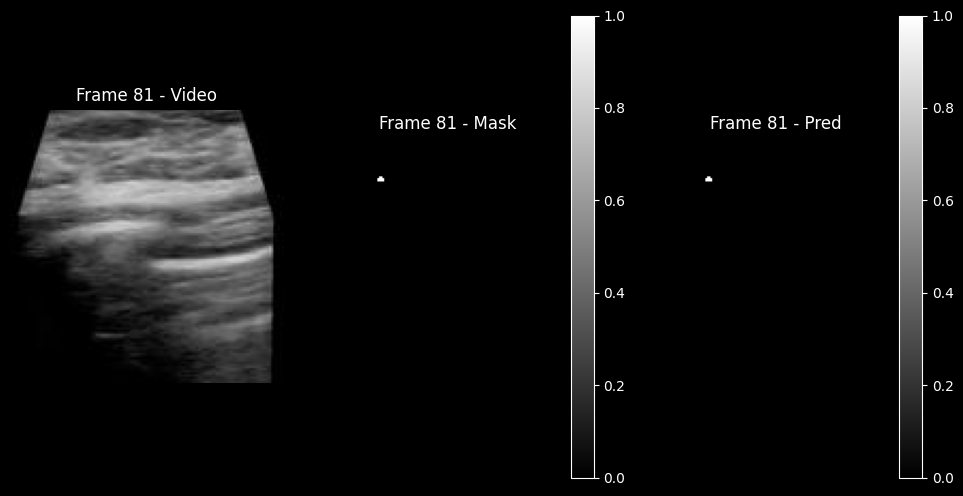

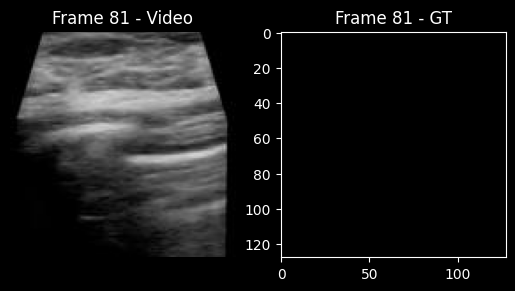

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import torchio
import torch
import skvideo.io as skio
video_path='/Users/emilio/Library/CloudStorage/Box-Box/GitHub/Breast-AI-model/src/2/2.mp4'
video_path='/Users/emilio/Library/CloudStorage/Box-Box/GitHub/Breast-AI-model/src/P4/video/4.1.avi'
gt_path='/Users/emilio/Library/CloudStorage/Box-Box/GitHub/Breast-AI-model/src/P4/mask/4.1.avi'
mask_path='/Users/emilio/Library/CloudStorage/Box-Box/GitHub/Breast-AI-model/src/predictions/2_mask.npy'
#mask_path='/Users/emilio/Library/CloudStorage/Box-Box/GitHub/Breast-AI-model/src/predictions/4.1_mask.npy'

video= skio.vread(video_path)
mask = np.squeeze(np.load(mask_path))
gt= skio.vread(gt_path)
print(video.shape)  # (D, H, W, C)
print(mask.shape)
print(np.max(mask))
print(np.sum(mask))
print(np.unique(mask))
#show the first frame of mask that is not zero
for i in range(mask.shape[0]):
    if np.any(mask[i]):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 3, 1)
        plt.imshow(video[i], cmap="gray")
        plt.title(f"Frame {i} - Video")
        plt.axis("off")
        plt.subplot(1, 3, 2)
        plt.imshow(mask[i], cmap="gray")
        plt.colorbar()
        plt.title(f"Frame {i} - Mask")
        plt.axis("off")
        plt.subplot(1, 3, 3)
        pred=(mask[i]>= 0.5)
        plt.imshow(pred, cmap="gray")
        plt.colorbar()
        plt.title(f"Frame {i} - Pred")
        plt.axis("off")
        plt.clim(0, 1)
        plt.show()
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(video[i], cmap="gray")
        plt.title(f"Frame {i} - Video")
        plt.axis("off")
        plt.subplot(1, 2, 2)
        plt.imshow(gt[i], cmap="gray")
        plt.title(f"Frame {i} - GT")
        plt.show()
        break
